In [147]:
# config all inputs
input_file = "raw/Natural Gas - Reduced.csv";

In [148]:
import pandas as pd
import numpy as np

# โหลดข้อมูล (ควรเปลี่ยนเส้นทางไฟล์ให้ถูกต้อง)
data = pd.read_csv(input_file, parse_dates=['Date'], index_col='Date')

In [149]:
# แยกข้อมูลออกเป็น train และ test sets
train = data[:'2022-12-31']
test = data['2023-01-01':]

In [150]:
key="Total Domestic Production"

ARIMA with Python
The statsmodels library stands as a vital tool for those looking to harness the power of ARIMA for time series forecasting in Python.

Building an ARIMA Model: A Step-by-Step Guide:

Model Definition: Initialize the ARIMA model by invoking ARIMA() and specifying the p, d, and q parameters.
Model Training: Train the model on your dataset using the fit() method.
Making Predictions: Generate forecasts by utilizing the predict() function and designating the desired time index or indices.
Let’s start with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

We’ll employ the ARIMA(5,1,0) configuration:

5 lags for autoregression (AR)
1st order differencing (I)
No moving average term (MA)

In [151]:
from statsmodels.tsa.arima.model import ARIMA

# สร้างโมเดล ARIMA
model = ARIMA(train[key], order=(1, 1, 1))
arima_model = model.fit()

c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [152]:
# พยากรณ์ค่าในอนาคต
forecast = arima_model.get_forecast(steps=len(test))
predicted = forecast.predicted_mean
conf_int = forecast.conf_int()

c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\nook-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


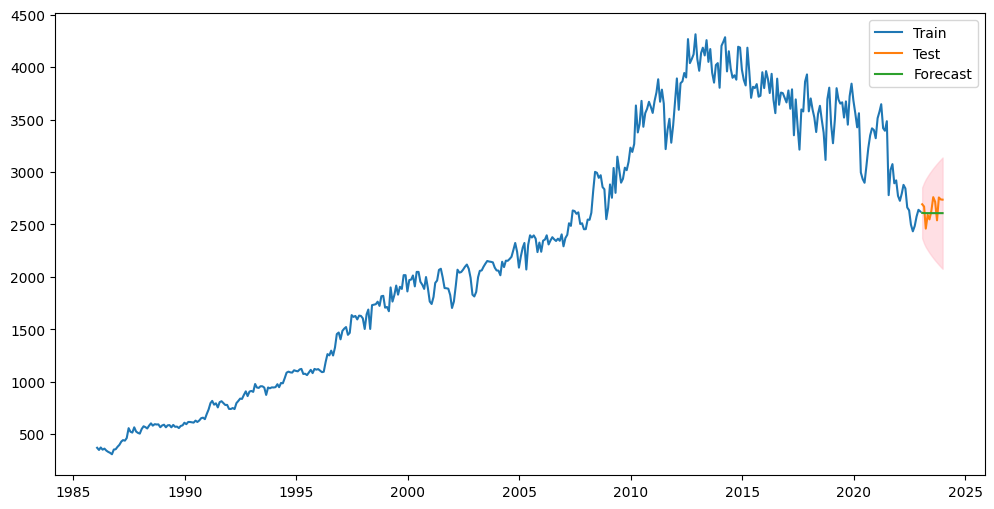

In [153]:
import matplotlib.pyplot as plt

# วาดกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))
plt.plot(train.index, train[key], label='Train')
plt.plot(test.index, test[key], label='Test')
plt.plot(test.index, predicted, label='Forecast')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.legend()
plt.show()

In [154]:
# สร้าง DataFrame สำหรับผลการพยากรณ์
forecast_df = pd.DataFrame({
    'date': test.index,
    'actual': test[key],
    'forecast': predicted.values.astype(int),
    'lower_conf_int': conf_int.iloc[:, 0].values.astype(int),
    'upper_conf_int': conf_int.iloc[:, 1].values.astype(int)
})

# ตั้งค่า index ของ DataFrame เป็น date
forecast_df.set_index('date', inplace=True)

# ส่งออกผลลัพธ์ไปยังไฟล์ .csv
forecast_df.to_csv('output/forecasted_gas_demand_arima.csv')